In [1]:
import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np
from fire_utils import *

# Graph

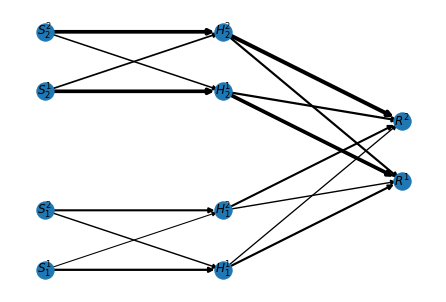

In [2]:
def eps_noise(scale=0.5):
    return np.random.random() * scale;


nodes = [r'$S_1^1$',r'$S_1^2$', r'$S_2^1$', r'$S_2^2$', r'$H_1^1$', r'$H_1^2$', r'$H_2^1$', r'$H_2^2$', r'$R^1$', r'$R^2$']

beta = 400
betas  = [0, 0, 0, 0, 
          beta, beta, beta, beta, 
         beta, beta]


pos = [(0, 0), (0, 1), (0, 3), (0, 4),
      (1, 0), (1, 1), (1, 3), (1, 4),
      (2, 1.5), (2, 2.5)]

betas = dict(zip(nodes,betas))
pos = dict(zip(nodes,pos))


w_strong =  3
w_medium = 2
w_weak = 1.5 


G2 = nx.DiGraph()
G2.add_nodes_from(nodes)
nx.set_node_attributes(G2, betas, 'beta')
factor = 1.2

#input-representation links
G2.add_edge(r'$S_1^1$',r'$H_1^1$', weight=w_medium + eps_noise()) ### mediuim
G2.add_edge(r'$S_1^2$',r'$H_1^2$', weight=w_medium + eps_noise())
G2.add_edge(r'$S_2^1$',r'$H_2^1$', weight=factor*w_strong + eps_noise())
G2.add_edge(r'$S_2^2$',r'$H_2^2$', weight=factor*w_strong + eps_noise())

# #input cross links
G2.add_edge(r'$S_1^1$',r'$H_1^2$', weight=-w_weak + eps_noise())
G2.add_edge(r'$S_1^2$',r'$H_1^1$', weight=-w_weak + eps_noise())
G2.add_edge(r'$S_2^1$',r'$H_2^2$', weight=-factor*w_weak + eps_noise())
G2.add_edge(r'$S_2^2$',r'$H_2^1$', weight=-factor*w_weak + eps_noise())

#representation-output links
#color naming
G2.add_edge(r'$H_1^1$', r'$R^1$', weight=w_medium + eps_noise())
G2.add_edge(r'$H_1^2$', r'$R^2$', weight=w_medium + eps_noise())
G2.add_edge(r'$H_1^1$', r'$R^2$', weight=-w_weak + eps_noise())
G2.add_edge(r'$H_1^2$','$R^1$', weight=-w_weak + eps_noise())
#word reading
G2.add_edge(r'$H_2^1$', r'$R^1$', weight=factor*w_strong + eps_noise())
G2.add_edge(r'$H_2^2$', r'$R^2$', weight=factor*w_strong + eps_noise())
G2.add_edge(r'$H_2^1$', r'$R^2$', weight=-factor*w_medium + eps_noise())
G2.add_edge(r'$H_2^2$', r'$R^1$', weight=-factor*w_medium + eps_noise())
edges = G2.edges()
weights = [G2[u][v]['weight'] for u,v in edges]


nx.draw(G2, pos=pos, width=weights)
nx.draw_networkx_labels(G2, pos, verticalalignment='center', horizontalalignment='center');
# plt.savefig('../../figures_for_reboot/Stroop-micro-graph.pdf')

In [3]:
vertical_pos = {}
for p in pos:
    vertical_pos[p] = pos[p][::-1]


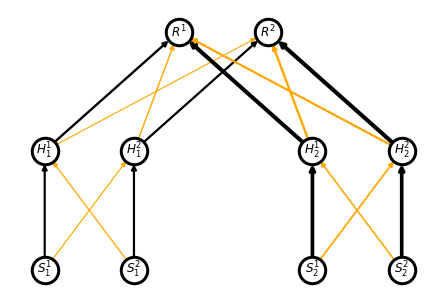

In [5]:
color_list = ['black', 'black', 'orange']
color_edges = [color_list[int(np.sign(x))] for x in weights]

nx.draw(G2, pos=vertical_pos, width=np.abs(weights), 
        node_color='white',
        edge_color = color_edges,
        node_size = 700,
        edgecolors='black',
        linewidths=3);
nx.draw_networkx_labels(G2, vertical_pos, 
                        verticalalignment='center', 
                        horizontalalignment='center', 
                       font_weight='30');

# single task


In [5]:
from collections import defaultdict
probs_dict = {}

## generate single task trajectories in absence of control 

In [6]:
# built as [sources, correct, incorrect]
single_tasks = {}
single_tasks['red color naming'] = [[r'$S_1^r$'], [r'$R^r$'], [r'$R^g$']]
single_tasks['green color naming'] = [[r'$S_1^g$'], [r'$R^g$'], [r'$R^r$']]
single_tasks['red word reading'] = [[r'$S_2^r$'], [r'$R^r$'], [r'$R^g$']]
single_tasks['green word reading'] = [[r'$S_2^g$'], [r'$R^g$'], [r'$R^r$']]


In [7]:
single_trajectories = {}
probs_dict['single stimulus'] = {}
for key in single_tasks:
    single_trajectories[key] = trajectory_set_construction(G2, *single_tasks[key])
    probs_not_probs = [traj_prob(G2, x) for x in single_trajectories[key]]
    final_probs = [x[0]*x[1] for x in probs_not_probs]
    probs_dict['single stimulus'][key] = np.sum(final_probs);

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 12972.07it/s]


# congruent trajectories

In [9]:
congruent_tasks = {}
congruent_tasks['red color naming'] = [[r'$S_1^r$', r'$S_2^r$'], [r'$R^r$'], [r'$R^g$']]
congruent_tasks['red word reading'] = [[r'$S_1^r$', r'$S_2^r$'], [r'$R^r$'], [r'$R^g$']]
congruent_tasks['green color naming'] = [[r'$S_1^g$', r'$S_2^g$'], [r'$R^g$'], [r'$R^r$']]
congruent_tasks['green word reading'] = [[r'$S_1^g$', r'$S_2^g$'], [r'$R^g$'], [r'$R^r$']]

congruent_trajectories = {}
probs_dict['congruent stimuli'] = {}

for key in congruent_tasks:
    congruent_trajectories[key] = trajectory_set_construction(G2, *congruent_tasks[key])
    probs_not_probs = [traj_prob(G2, x) for x in congruent_trajectories[key]]
    final_probs = [x[0]*x[1] for x in probs_not_probs]
    probs_dict['congruent stimuli'][key] = np.sum(final_probs);

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 61380.06it/s]


In [12]:
incongruent_tasks = {}

incongruent_tasks['red color naming'] = [[r'$S_1^r$', r'$S_2^g$'], [r'$R^r$'], [r'$R^g$']]
incongruent_tasks['green color naming'] = [[r'$S_1^g$', r'$S_2^r$'], [r'$R^g$'], [r'$R^r$']]
incongruent_tasks['red word reading'] = [[r'$S_1^g$', r'$S_2^r$'], [r'$R^r$'], [r'$R^g$']]
incongruent_tasks['green word reading'] = [[r'$S_1^r$', r'$S_2^g$'], [r'$R^g$'], [r'$R^r$']]

In [13]:
incongruent_trajectories = {} # items [active nodes, non firing nodes]
incongruent_trajectories = {}
probs_dict['incongruent stimuli'] = {}

for key in incongruent_tasks:
    incongruent_trajectories[key] = trajectory_set_construction(G2, *incongruent_tasks[key])
    probs_not_probs = [traj_prob(G2, x) for x in incongruent_trajectories[key]]
    final_probs = [x[0]*x[1] for x in probs_not_probs]
    probs_dict['incongruent stimuli'][key] = np.sum(final_probs);

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 87992.39it/s]


Text(0, 0.5, 'Processing cost')

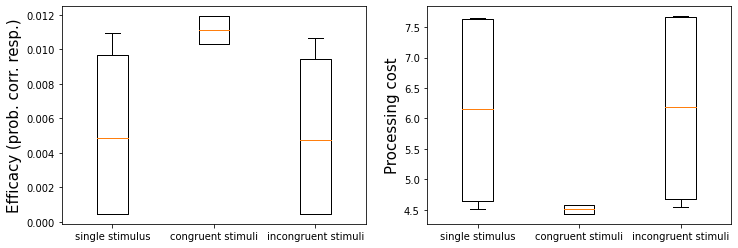

In [16]:
fig = plt.figure(figsize=(12,4))

ax = plt.subplot(121)
boxes = [list(probs_dict[x].values()) for x in probs_dict]
plt.boxplot(boxes, labels=probs_dict.keys());
plt.ylabel('Efficacy (prob. corr. resp.)', fontsize=15)

ax = plt.subplot(122)
log_box = [[-np.log(x) for x in y] for y in boxes]
plt.boxplot(log_box, labels=probs_dict.keys());
plt.ylabel('Processing cost', fontsize=15)

# effect of control

In [18]:
# we do this by unlocking nodes using betas

def controlled_graph(g, unlocked_nodes):
    gg = g.copy();
    betas = nx.get_node_attributes(g, 'beta');
    for n in unlocked_nodes:
        betas[n] = unlocked_nodes[n];
    nx.set_node_attributes(gg, betas, 'beta');
    return gg;



## single stimulus

In [19]:
primary_control, secondary_control  = 3, 3

In [20]:
single_tasks

{'red color naming': [['$S_1^r$'], ['$R^r$'], ['$R^g$']],
 'green color naming': [['$S_1^g$'], ['$R^g$'], ['$R^r$']],
 'red word reading': [['$S_2^r$'], ['$R^r$'], ['$R^g$']],
 'green word reading': [['$S_2^g$'], ['$R^g$'], ['$R^r$']]}

In [21]:
unlock_betas = {}
unlock_betas['single stimulus'] = {}
unlock_betas['single stimulus']['red color naming'] = {r'$H_1^r$': primary_control, r'$R^r$': secondary_control}
unlock_betas['single stimulus']['green color naming'] = {r'$H_1^g$': primary_control, r'$R^g$': secondary_control}
unlock_betas['single stimulus']['red word reading'] = {r'$H_2^r$': primary_control, r'$R^r$': secondary_control}
unlock_betas['single stimulus']['green word reading'] = {r'$H_2^g$': primary_control, r'$R^g$': secondary_control}


In [22]:
controlled_probs_dict = {}
controlled_single_trajectories = {}
controlled_probs_dict['single stimulus'] = {}
for key in single_tasks:
    g = controlled_graph(G2, unlock_betas['single stimulus'][key])
    controlled_single_trajectories[key] = trajectory_set_construction(g, *single_tasks[key])
    probs_not_probs = [traj_prob(g, x) for x in controlled_single_trajectories[key]]
    final_probs = [x[0]*x[1] for x in probs_not_probs]
    controlled_probs_dict['single stimulus'][key] = np.sum(final_probs);

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 19358.33it/s]


## congruent stimuli 

In [24]:
primary_control, secondary_control  = .1, .1

In [25]:
unlock_betas = {}
unlock_betas['congruent stimuli'] = {}
unlock_betas['congruent stimuli']['red color naming'] = {r'$H_1^r$': primary_control, 
                                                           r'$H_2^r$': secondary_control, 
                                                           r'$R^r$': primary_control}
unlock_betas['congruent stimuli']['green color naming'] = {r'$H_1^g$': primary_control, 
                                                             r'$H_2^g$': secondary_control, 
                                                             r'$R^g$': primary_control}
unlock_betas['congruent stimuli']['red word reading'] = {r'$H_1^r$': secondary_control, 
                                                           r'$H_2^r$': primary_control, 
                                                           r'$R^r$': primary_control}
unlock_betas['congruent stimuli']['green word reading'] = {r'$H_1^g$': secondary_control, 
                                                             r'$H_2^g$': primary_control, 
                                                             r'$R^g$': primary_control}

In [26]:
controlled_congruent_trajectories = {}
controlled_probs_dict['congruent stimuli'] = {}
for key in congruent_tasks:
    g = controlled_graph(G2, unlock_betas['congruent stimuli'][key])
    controlled_congruent_trajectories[key] = trajectory_set_construction(g, *congruent_tasks[key])
    probs_not_probs = [traj_prob(g, x) for x in controlled_congruent_trajectories[key]]
    final_probs = [x[0]*x[1] for x in probs_not_probs]
    controlled_probs_dict['congruent stimuli'][key] = np.sum(final_probs);

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 47662.55it/s]


## incongruent stimuli

In [28]:
primary_control, secondary_control  = 5, 5

In [29]:
unlock_betas = {}
unlock_betas['incongruent stimuli'] = {}
unlock_betas['incongruent stimuli']['red color naming'] = {r'$H_1^r$': primary_control, 
                                                           r'$H_2^g$': secondary_control, 
                                                           r'$R^r$': primary_control}
unlock_betas['incongruent stimuli']['green color naming'] = {r'$H_1^g$': primary_control, 
                                                             r'$H_2^r$': secondary_control, 
                                                             r'$R^r$': primary_control}
unlock_betas['incongruent stimuli']['red word reading'] = {r'$H_1^g$': secondary_control, 
                                                           r'$H_2^r$': primary_control, 
                                                           r'$R^r$': primary_control}
unlock_betas['incongruent stimuli']['green word reading'] = {r'$H_1^r$': secondary_control, 
                                                             r'$H_2^g$': primary_control, 
                                                             r'$R^g$': primary_control}


In [30]:
controlled_incongruent_trajectories = {}
controlled_probs_dict['incongruent stimuli'] = {}
for key in incongruent_tasks:
    g = controlled_graph(G2, unlock_betas['incongruent stimuli'][key])
    controlled_incongruent_trajectories[key] = trajectory_set_construction(g, *incongruent_tasks[key])
    probs_not_probs = [traj_prob(g, x) for x in controlled_incongruent_trajectories[key]]
    final_probs = [x[0]*x[1] for x in probs_not_probs]
    controlled_probs_dict['incongruent stimuli'][key] = np.sum(final_probs);

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 50942.96it/s]


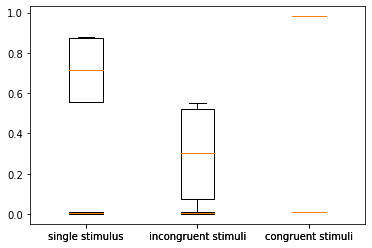

In [31]:
words = list(controlled_probs_dict.keys())
words = [words[0], words[2], words[1]]
plt.boxplot([list(controlled_probs_dict[x].values()) for x in words], 
           labels=words);

plt.boxplot([list(probs_dict[x].values()) for x in words], 
           labels=words);

In [32]:
tasks = ['color naming', 'word reading']
task_perf = {}
for t in tasks:
    task_perf[t] = {}
    for x in words:
        task_perf[t][x] = []
        for k in probs_dict[x]:
            if t in k:
                task_perf[t][x].append(probs_dict[x][k])
                
control_task_perf = {}
for t in tasks:
    control_task_perf[t] = {}
    for x in words:
        control_task_perf[t][x] = []
        for k in controlled_probs_dict[x]:
            if t in k:
                control_task_perf[t][x].append(controlled_probs_dict[x][k])

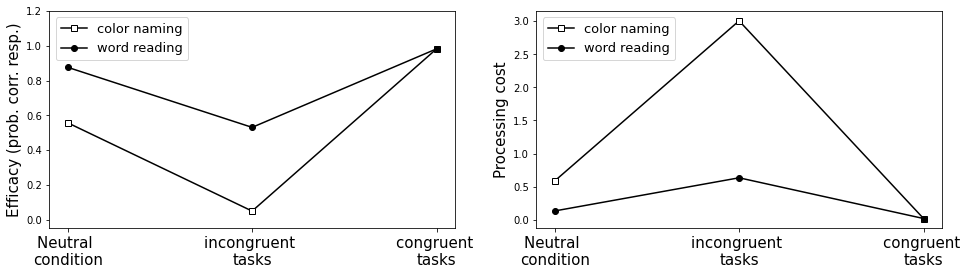

In [36]:
# plt.plot()
# plt.plot([np.mean(control_task_perf[tasks[0]][n]) for n in words])

words = list(controlled_probs_dict.keys())
words = [words[0], words[2], words[1]]


label_words = ['Neutral \ncondition', 'incongruent \ntasks', 'congruent \ntasks']

fig = plt.figure(figsize=(16,4))

ax = plt.subplot(121)

plt.plot([np.mean(control_task_perf[tasks[0]][n]) for n in words], '-ks', label = tasks[0], markerfacecolor='white')
# plt.plot([np.mean(task_perf[tasks[0]][n]) for n in words], '--ks', markerfacecolor='white', alpha=.5)

plt.plot([np.mean(control_task_perf[tasks[1]][n]) for n in words], '-ko', label = tasks[1])
# plt.plot([np.mean(task_perf[tasks[1]][n]) for n in words], '--ko', alpha=.5)

plt.xticks(range(3), label_words, fontsize=15)
plt.legend(loc='upper left', fontsize=13)
plt.ylabel('Efficacy (prob. corr. resp.)', fontsize=15)
plt.ylim(-0.05, 1.2)


plt.subplot(122)
plt.plot([-np.log(np.mean(control_task_perf[tasks[0]][n])) for n in words], '-ks', label = tasks[0], markerfacecolor='white')
# plt.plot([-np.log(np.mean(task_perf[tasks[0]][n])) for n in words], '--ks', markerfacecolor='white', alpha=.5)

plt.plot([-np.log(np.mean(control_task_perf[tasks[1]][n])) for n in words], '-ko', label = tasks[1])
# plt.plot([-np.log(np.mean(task_perf[tasks[1]][n])) for n in words], '--ko', alpha=.5)
plt.xticks(range(3), label_words, fontsize=15)
plt.legend(loc='upper left', fontsize=13)
# plt.ylim(-0.1,4.)
plt.ylabel('')
plt.ylabel('Processing cost', fontsize=15)

# viz 

In [34]:
single_trajectories = {} # items [active nodes, non firing nodes]
single_trajectories[1] = [[r'$S_1^r$', r'$H_1^r$', r'$R^r$'], [r'$R^g$']]
single_trajectories[2] = [[r'$S_2^r$', r'$H_2^r$', r'$R^r$'], [r'$R^g$']]


valid_trajectories = {} # items [active nodes, non firing nodes]
valid_trajectories['red'] = {}
valid_trajectories['red'][1] = [[r'$S_1^r$', r'$S_2^r$', r'$H_1^r$', r'$R^r$'], [r'$H_2^r$', r'$R^g$']]
valid_trajectories['red'][2] = [[r'$S_1^r$', r'$S_2^r$', r'$H_2^r$', r'$R^r$'], [r'$H_1^r$', r'$R^g$']]
valid_trajectories['red'][3] = [[r'$S_1^r$', r'$S_2^r$', r'$H_1^r$', r'$H_2^r$', r'$R^r$'], [r'$R^g$']]

valid_trajectories['green'] = {}
valid_trajectories['green'][1] = [[r'$S_1^g$', r'$S_2^g$', r'$H_1^g$', r'$R^g$'], [r'$H_2^g$', r'$R^r$']]
valid_trajectories['green'][2] = [[r'$S_1^g$', r'$S_2^g$', r'$H_2^g$', r'$R^g$'], [r'$H_1^g$', r'$R^r$']]
valid_trajectories['green'][3] = [[r'$S_1^g$', r'$S_2^g$', r'$H_1^g$', r'$H_2^g$', r'$R^g$'], [r'$R^r$']]


incongruent_trajectories = {} # items [active nodes, non firing nodes]
# 1 wins
incongruent_trajectories['Win_1'] = {}
incongruent_trajectories['Win_1'][1] = [[r'$S_1^r$', r'$S_2^g$', r'$H_1^r$', r'$R^r$'], [r'$H_2^g$', r'$R^g$']]
incongruent_trajectories['Win_1'][2] = [[r'$S_1^r$', r'$S_2^g$', r'$H_1^r$', r'$H_2^g$', r'$R^r$'], [r'$R^g$']]

# 2 wins
incongruent_trajectories['Win_2'] = {}
incongruent_trajectories['Win_2'][1] = [[r'$S_1^r$', r'$S_2^g$', r'$H_1^r$', r'$H_2^g$', r'$R^g$'], [r'$R^r$']]
incongruent_trajectories['Win_2'][2] = [[r'$S_1^r$', r'$S_2^g$', r'$H_2^g$', r'$R^g$'], [r'$H_1^r$', r'$R^r$']]


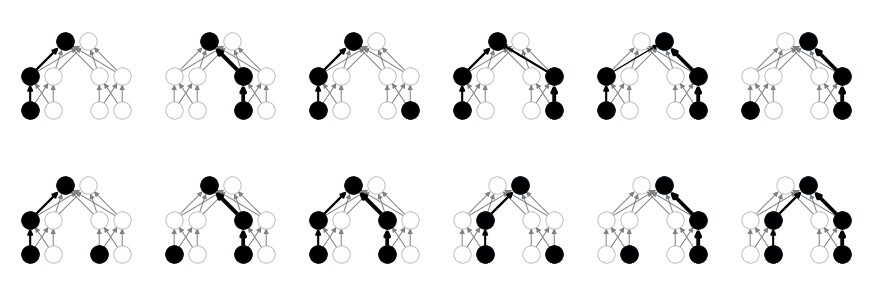

In [35]:

from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(12, 4), constrained_layout=True)

gs = GridSpec(2, 6, figure=fig)
counter = 0 
for traj in single_trajectories.values():
    ax1 = fig.add_subplot(gs[0, counter])
    draw_trajectory(G2, traj, vertical_pos, factor=1)
    counter+=1

for key in incongruent_trajectories:
    for traj in incongruent_trajectories[key].values():
        ax1 = fig.add_subplot(gs[0, counter])
        draw_trajectory(G2, traj, vertical_pos, factor=1)
        counter+=1

counter = 0
for key in valid_trajectories:
    for traj in valid_trajectories[key].values():
        ax1 = fig.add_subplot(gs[1, counter])
        draw_trajectory(G2, traj, vertical_pos, factor=1)
        counter+=1